In [95]:
%load_ext autoreload
%autoreload 2

In [96]:
import numpy as np
import skimage.io as io

import matplotlib
%matplotlib inline

import utils, morph

In [97]:
from pathlib import Path
data = Path("input")
data.mkdir(parents=True, exist_ok=True)

In [98]:
# matplotlib.use("TkAgg")
# matplotlib.use("Tk")
# matplotlib.interactive(True)

# Alignment

In [99]:
%matplotlib tk
if not Path("input/me_align.pkl").exists():
    me_align_pts = utils.pick_points("input/me_original.jpg", 2, APPEND_CORNERS=False)
    utils.save_points(me_align_pts, "input/me_align.pkl")
me_align_pts = utils.load_points("input/me_align.pkl")

if not Path("input/iu_align.pkl").exists():
    iu_align_pts = utils.pick_points("input/iu_original.jpg", 2, APPEND_CORNERS=False)
    utils.save_points(iu_align_pts, "input/iu_align.pkl")
iu_align_pts = utils.load_points("input/iu_align.pkl")

In [100]:
%matplotlib inline

In [101]:
iu_align_pts

array([[323.27199216, 531.44349544],
       [572.88686297, 533.47288463]])

In [102]:
iu_align_pts

array([[323.27199216, 531.44349544],
       [572.88686297, 533.47288463]])

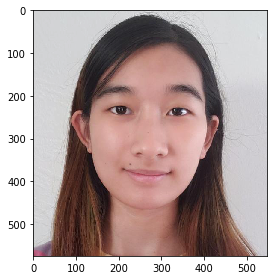

In [103]:
me = utils.to_img_arr("input/me.jpg")
io.imshow(me)

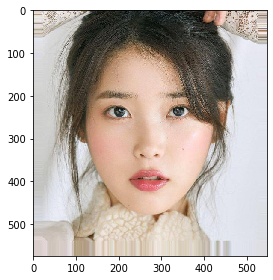

In [104]:
iu = utils.to_img_arr("input/iu.jpg")
io.imshow(iu)

# Define Correspondences

In [105]:
NUM_POINTS = 59

In [106]:
%matplotlib tk
if not Path("input/me.pkl").exists():
    me_pts = utils.pick_points("input/me.jpg", NUM_POINTS)
    utils.save_points(me_pts, "input/me.pkl")
me_pts = utils.load_points("input/me.pkl")
assert len(me_pts) == NUM_POINTS + 4, len(me_pts)

In [107]:
%matplotlib tk
if not Path("input/iu.pkl").exists():
    iu_pts = utils.pick_points("input/iu.jpg", NUM_POINTS)
    utils.save_points(iu_pts, "input/iu.pkl")
iu_pts = utils.load_points("input/iu.pkl")
assert len(iu_pts) == NUM_POINTS + 4, len(iu_pts)

# Compute Morphing

In [117]:
%matplotlib inline

In [139]:
import morph
middle_img, mid_pts, triangulation = morph.compute_middle_object(me, iu, me_pts, iu_pts, alpha=0.5)
# io.imshow(middle_img)
middle_img.shape

(575, 547, 3)

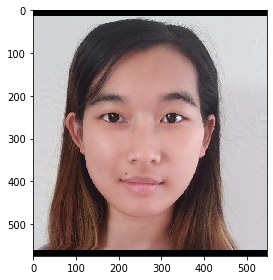

In [140]:
me_warped = morph.warp_img(me, me_pts, mid_pts, triangulation)
io.imshow(me_warped)

In [141]:
iu_warped = morph.warp_img(iu, iu_pts, mid_pts, triangulation)

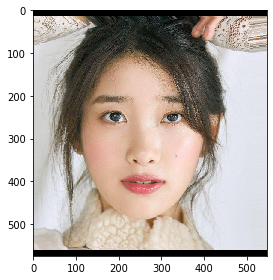

In [142]:
io.imshow(iu_warped)

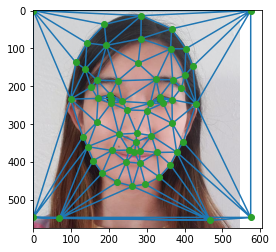

In [143]:
morph.plot_tri_mesh(me, me_pts, triangulation)

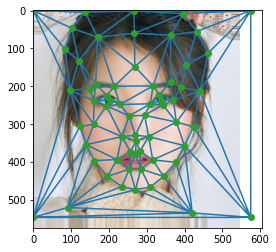

In [144]:
morph.plot_tri_mesh(iu, iu_pts, triangulation)

Frame 1 morph time with alpha 0.0: 0.6654341220855713
Frame 2 morph time with alpha 0.05263157894736842: 0.7413220405578613
Frame 3 morph time with alpha 0.10526315789473684: 0.6727240085601807
Frame 4 morph time with alpha 0.15789473684210525: 0.6933209896087646
Frame 5 morph time with alpha 0.21052631578947367: 0.7064309120178223
Frame 6 morph time with alpha 0.2631578947368421: 0.6700918674468994
Frame 7 morph time with alpha 0.3157894736842105: 0.66473388671875
Frame 8 morph time with alpha 0.3684210526315789: 0.6840100288391113
Frame 9 morph time with alpha 0.42105263157894735: 0.6717467308044434
Frame 10 morph time with alpha 0.47368421052631576: 0.6537051200866699
Frame 11 morph time with alpha 0.5263157894736842: 0.6924610137939453
Frame 12 morph time with alpha 0.5789473684210527: 0.6604580879211426
Frame 13 morph time with alpha 0.631578947368421: 0.6632978916168213
Frame 14 morph time with alpha 0.6842105263157894: 0.6607742309570312
Frame 15 morph time with alpha 0.73684210

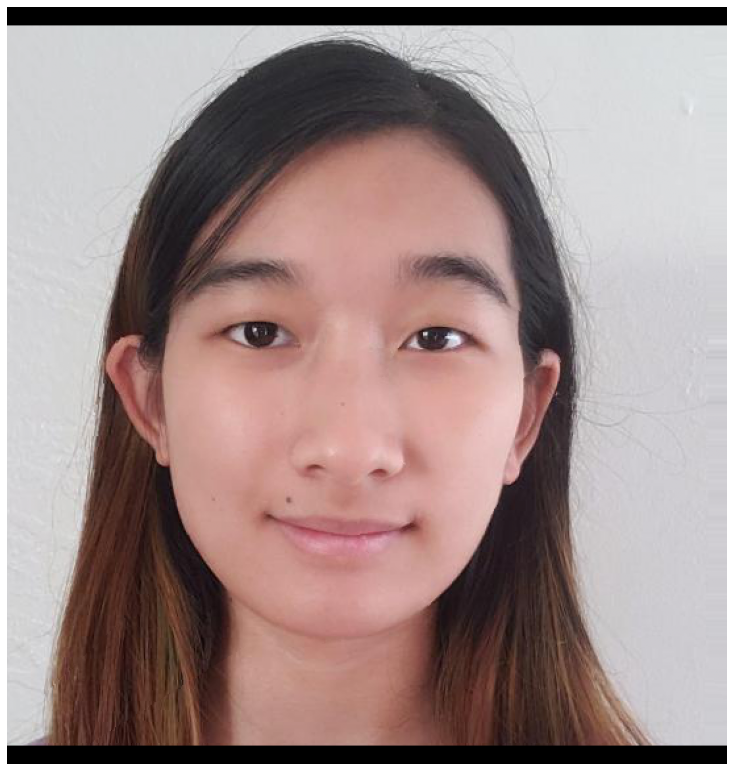

In [145]:
video_path = Path("output/me_iu.mp4")
video_frames = morph.compute_morph_video(me, iu, me_pts, iu_pts, video_path, num_frames=20, fps=10)

# Population Mean

In [146]:
import population_mean as pop

In [155]:
from my_types import to_img_arr
import matplotlib.pyplot as plt
import utils
man = to_img_arr("imm_face_db/01-1m.jpg")
man_pts = utils.load_points_from_asf("imm_face_db/01-1m.asf", APPEND_CORNERS=True)
man.shape

(480, 640, 3)

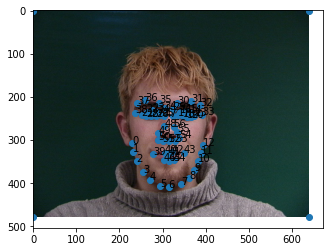

In [160]:
fig, ax = plt.subplots()
plt.imshow(man)
ax.scatter(points[:, 0], points[:, 1])
n = np.arange(0,57)
for i, txt in enumerate(n):
    ax.annotate(txt, (man_pts[:, 0][i], man_pts[:, 1][i]))
# img = "imm_face_db/01-1m.jpg"
# points = "imm_face_db/01-1m.asf"
# utils.plot_points(img, points)

In [166]:
pop.pop_align(man, male_pts, )

TypeError: pop_align() missing 3 required positional arguments: 'points', 'left_idx', and 'right_idx'

In [162]:
pop_dir = Path("imm_face_db")

all_imgs = list(Path(pop_dir).glob("*-1*.jpg"))
all_pts = list(Path(pop_dir).glob("*-1*.asf"))

male_imgs = list(Path(pop_dir).glob("*-1m.jpg"))
male_pts = list(Path(pop_dir).glob("*-1m.asf"))

female_imgs = list(Path(pop_dir).glob("*-1f.jpg"))
female_pts = list(Path(pop_dir).glob("*-1f.asf"))

In [170]:
pop.compute_population_mean(all_imgs, all_pts)

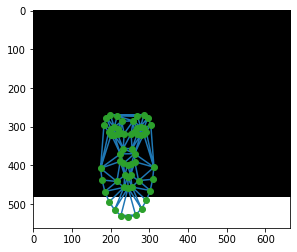

In [165]:
morph.plot_tri_mesh(mean_img, mean_pts, triangulation)

# Bells and Whistles

In [132]:
import utils, morph

In [133]:
%matplotlib tk
if not Path("input/im_ugly.pkl").exists():
    other_pts = utils.pick_points("input/im_ugly.jpg", NUM_POINTS)
    utils.save_points(other_pts, "input/im_ugly.pkl")
other_pts = utils.load_points("input/im_ugly.pkl")
assert len(other_pts) == NUM_POINTS + 4, len(other_pts)

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/tkinter/__init__.py", line 1883, in __call__
    return self.func(*args)
  File "/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/tkinter/__init__.py", line 804, in callit
    func(*args)
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer

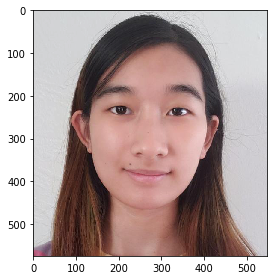

In [134]:
io.imshow(me)

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/tkinter/__init__.py", line 1883, in __call__
    return self.func(*args)
  File "/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/tkinter/__init__.py", line 804, in callit
    func(*args)
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer

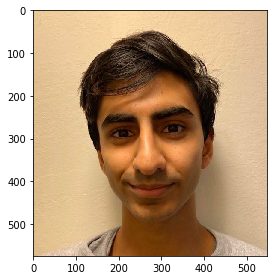

In [135]:
other = utils.to_img_arr("input/im_ugly.jpg")
io.imshow(other)

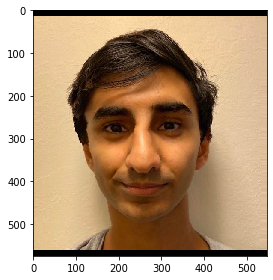

In [136]:
%matplotlib inline
middle_img, mid_pts, triangulation = morph.compute_middle_object(me, other, me_pts, other_pts, alpha=0.5)
me_warped = morph.warp_img(me, me_pts, mid_pts, triangulation)
other_warped = morph.warp_img(other, other_pts, mid_pts, triangulation)
io.imshow(other_warped)

In [137]:
# morph.plot_tri_mesh(other, other_pts, triangulation)

Frame 1 morph time with alpha 0.0: 0.6347289085388184
Frame 2 morph time with alpha 0.012658227848101266: 0.6627600193023682
Frame 3 morph time with alpha 0.02531645569620253: 0.6453402042388916
Frame 4 morph time with alpha 0.0379746835443038: 0.651792049407959
Frame 5 morph time with alpha 0.05063291139240506: 0.7662348747253418
Frame 6 morph time with alpha 0.06329113924050633: 0.6789131164550781
Frame 7 morph time with alpha 0.0759493670886076: 0.6892108917236328
Frame 8 morph time with alpha 0.08860759493670886: 0.6938951015472412
Frame 9 morph time with alpha 0.10126582278481013: 0.6620650291442871
Frame 10 morph time with alpha 0.11392405063291139: 0.6432030200958252
Frame 11 morph time with alpha 0.12658227848101267: 0.6437549591064453
Frame 12 morph time with alpha 0.13924050632911392: 0.6365799903869629
Frame 13 morph time with alpha 0.1518987341772152: 0.6617190837860107
Frame 14 morph time with alpha 0.16455696202531644: 0.8130531311035156
Frame 15 morph time with alpha 0.1

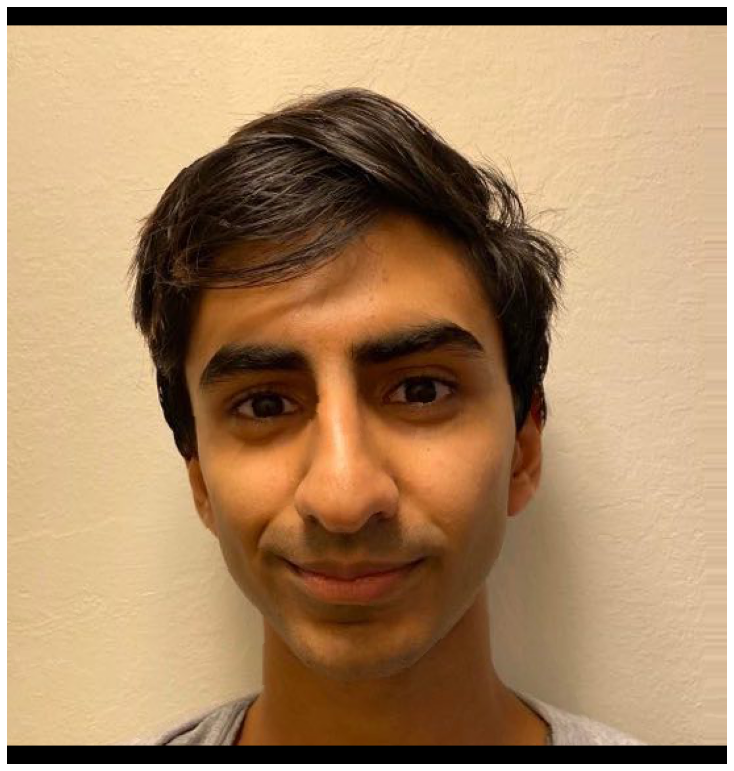

In [138]:
num_frames=80
fps=25

video_path = Path("output/bells.mp4")
video_frames = morph.compute_morph_video(
    me, other, me_pts, other_pts, video_path, num_frames=80, fps=25, boomerang=False
)